# Start-up of a Couette Flow 

#### Nada Naser 11/20/2019

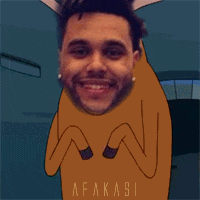

In [42]:
from IPython.display import Image
Image(filename='weeknd.gif')   

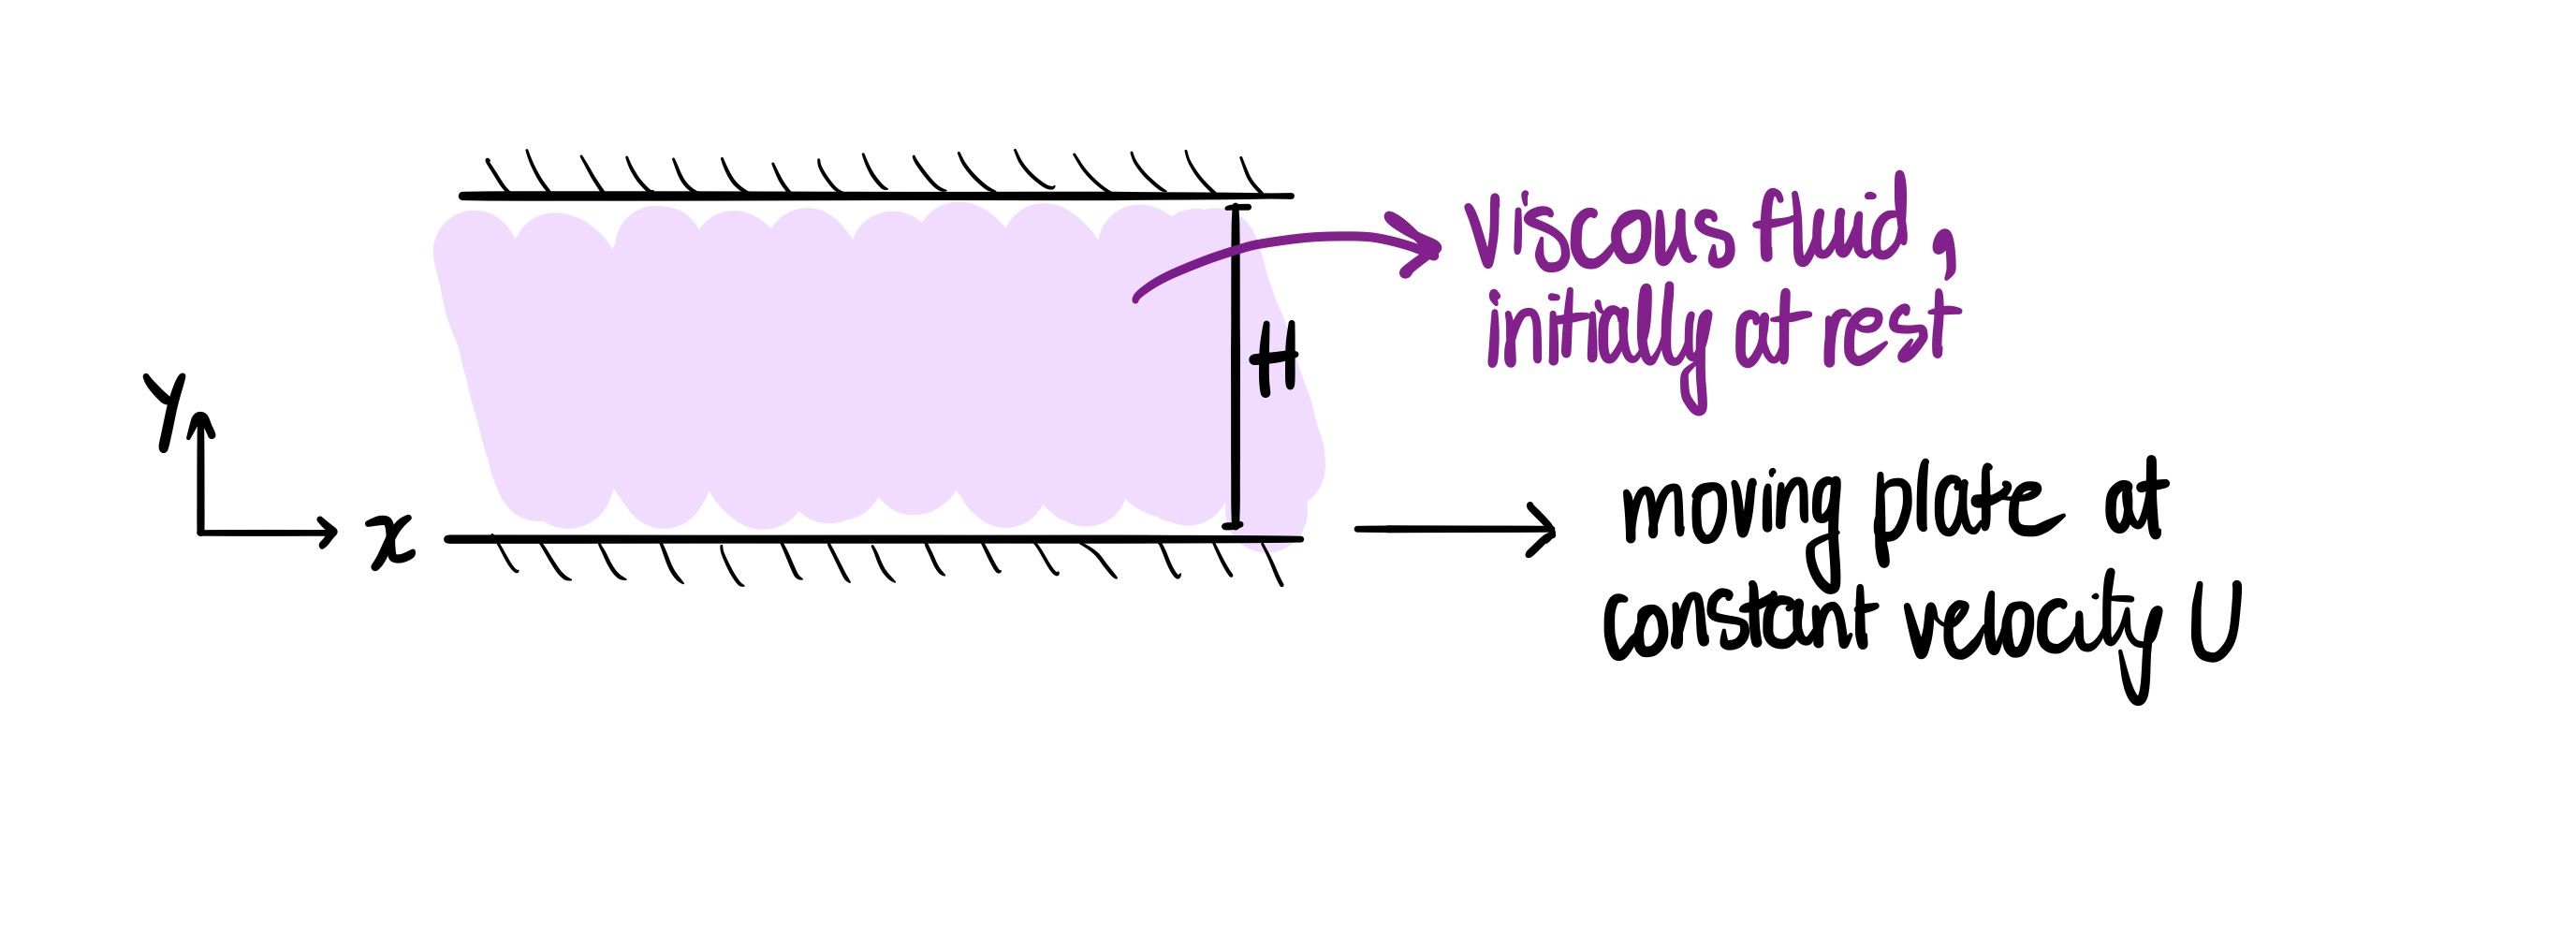

In [43]:
from IPython.display import Image
Image(filename='couette_flow.jpg',width=1000,height=1000)

Definition of a Couette Flow: the flow of a viscous fluid in the space between two surfaces, one of which is moving tangentially relative to the other.

**Governing Equation**

Generic momentum balance $$ \rho \frac{ Dv}{Dt} = -\nabla p + \mu {\nabla}^2 v + \rho g $$ 

For a Newtonian fluid, with constant $\rho$ and $\mu$, in cartesian coordinates: 


$$ \rho \big( \frac{\partial v_x}{\partial t} + v_x \frac{\partial v_x}{\partial x} + v_y \frac{\partial v_x}{\partial y} + v_z \frac{\partial v_x}{\partial z} \big) = - \frac{\partial p}{\partial t} + \mu \big[ \frac{\partial^2 v_x}{\partial x^2} + \frac{\partial^2 v_x}{\partial y^2} + \frac{\partial^2 v_x}{\partial z^2} \big] $$

For a Couette flow: $ v_y = y_z = 0 $, no pressure effect, $v_x \ne v_x(x,z) $. 

Balance reduces to: 
$$ \rho \frac{\partial v_x}{\partial t} = \mu \frac{\partial^2 v_x}{\partial y^2} $$

$$  \frac{\partial v_x}{\partial t} = \nu \frac{\partial^2 v_x}{\partial y^2} $$
is the governing PDE with the following boundary conditions: 

#1 Fluid initially at rest $ v_x(y,0) = 0 $
#2 Upper plate is static $ v_x(H,t) = 0 $
#3 Lower plate is moving in a constant velocity $U$: $ v_x(0,t) = U $ 

Even though the governing equation is homogenous, the BC's are non-homogeneous. We need to transform the PDE using our knowledge of the Couette flow at steady state.  

At large times, the Couette velocity profule prevails a transient component as follows:
$$ v_x (y,t) = U (1- \frac{y}{H}) - v'_x(y,t) $$

So the governing PDE can be written as 

$$  \frac{\partial v'_x}{\partial t} = \nu \frac{\partial^2 v'_x}{\partial y^2} $$

with 

$$ v'_x(y,0) = U(1- \frac{y}{H}) $$
$$ v'_x(H,t) = 0 $$
$$ v'_x(0,t) = 0 $$

Now we can use the step function to find $v'_x(y,t)$

**De-dimensionalizing PDE** 

Let $$\eta = \frac{y}{H} , \tau = \frac{t\nu}{H^2} ,  V=\frac{v'_x}{U}$$

PDE becomes: 
$$ \frac{\partial V}{\partial \tau} = \frac{\partial^2 V}{\partial \eta^2} $$

With boundary conditions: 
$$ V(\eta,0) = 1- \eta $$ 
$$ V(1,\tau) = 0 $$
$$ V(0,\tau) = 0 $$ 

Taking the Finite Fourier Transform of the PDE with resepct to $\eta$ and defining: 
$$ V(\eta,\tau) = \sum_{n=1}^\infty V_n(\tau) \phi_n (\eta)$$

Eigenvalue was found $ \lambda = n^2 \pi^2 $ and eigenfunction is 

$$ \phi_n (\eta) = \sqrt{2} sin(n \pi \eta) $$ 

$$ V_n(\tau) = \int_0^1 V \phi_n d \eta $$

$$ V_n(\tau) =  \frac{\sqrt{2}}{n\pi} \big[e^{-(n\pi)^2 \tau} \big] $$

Similar to the heat equation discussed in class, overall solution is: 

$$ V(\eta,\tau) = \sum_{n=1}^{\infty} \big( \frac{\sqrt{2}}{n\pi} \big) \big[ e^{-(n\pi)^2 \tau} \big] \sqrt{2} sin(n\pi \eta) $$

Rearranging: 
$$ V(\eta,\tau) = 2 \sum_{n=1}^{\infty} \big[ e^{-(n\pi)^2 \tau} \big] \frac{sin(n\pi \eta)}{n\pi} $$



We previously defined 
$$ v_x (y,t) = U (1- \frac{y}{H}) - v'_x(y,t) $$

which means: 

$$ V_{overall}(\eta,\tau) = ( 1 - \eta) - 2 \sum_{n=1}^{\infty} \big[ e^{-(n\pi)^2 \tau} \big] \frac{sin(n\pi \eta)}{n\pi} $$


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
%matplotlib qt

In [6]:
d = 101
x = np.linspace(0, 1, d) 
t = np.linspace(0, 1, d)
u = np.zeros((x.shape[0], t.shape[0]))

In [7]:
n = 1
xv, tv = np.meshgrid(x, t) #xv is eta, tv is tau

# Initial values
u =  (1-xv) - 2*np.sin(n*np.pi*xv)*(np.exp(-tv*(n*np.pi)**2))/(n*np.pi)

for ni in range(2, 600):
    u += - 2*np.sin(ni*np.pi*xv)*(np.exp(-tv*(ni*np.pi)**2))/(ni*np.pi)


In [8]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xv, tv, u, cmap=cm.viridis)

ax.set_xlabel('η')
ax.set_ylabel('τ')
ax.view_init(elev=00, azim=60)

Take-home messages from the plot above: 
- A fully-developed Couette flow at steady state have a linear velocity profile the corresponds to the term $ 1 - \eta$. 
- Profile reaches steady state at $\tau$ equals 0.3. For example, for air at 20 degrees C, this corresponds to $ t$ equals 2 s if $H$ was 1 cm. 